In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from aicsimageio import AICSImage
import pyvips

In [4]:
img = AICSImage("/home/d/Downloads/W409B (Aged) Series 1, 2, & 3.czi")

In [5]:
img.dims

<Dimensions [T: 1, C: 1, Z: 1, Y: 20908, X: 20408, S: 3]>

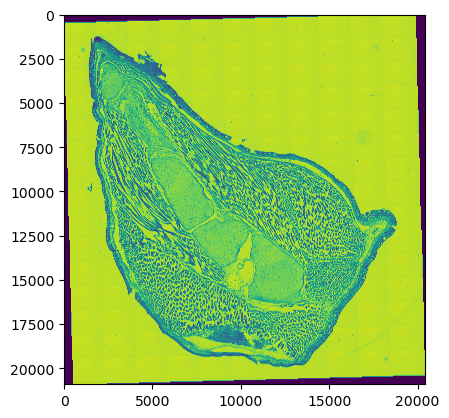

In [15]:
imshow( img.get_image_data("YX", C=0, S=0, T=0) )

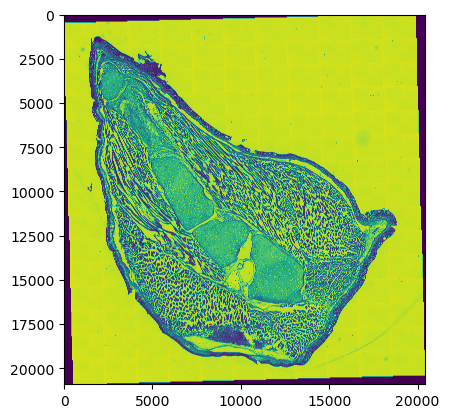

In [16]:
imshow( img.get_image_data("YX", C=0, S=1, T=0) )

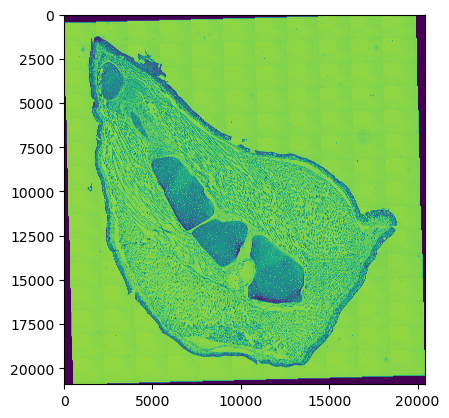

In [17]:
imshow( img.get_image_data("YX", C=0, S=2, T=0) )

In [6]:
#
# combine the 3 scans to one image
#
r = img.get_image_data("YX", C=0, S=0, T=0).astype(float)
r /= r.max()
r *= 255
r = r.astype(np.uint8)
g = img.get_image_data("YX", C=0, S=1, T=0).astype(float)
g /= g.max()
g *= 255
g = g.astype(np.uint8)
b = img.get_image_data("YX", C=0, S=2, T=0).astype(float)
b /= b.max()
b *= 255
b = b.astype(np.uint8)

In [7]:
arr = np.stack((r,g,b), axis=-1)

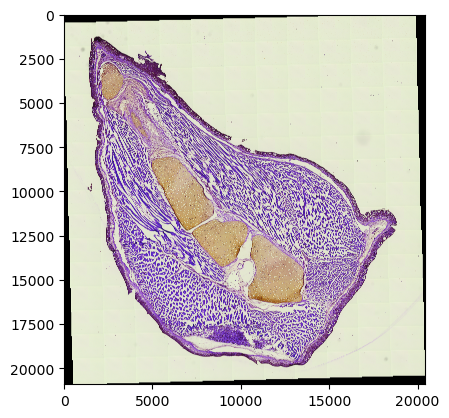

In [9]:
imshow(arr)

In [11]:
vips_img = pyvips.Image.new_from_array(arr)
vips_img.dzsave('web/axo')